In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
nowcast_tracer_path = "/results/SalishSea/nowcast-green/12apr16/SalishSea_1h_20160412_20160412_ptrc_T.nc"
diat_iopt_84_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr12_double_iopt_diat/SalishSea_1h_20160412_20160412_ptrc_T.nc"
diat_iopt_55_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/april12_55_iopt_diat/SalishSea_1h_20160412_20160412_ptrc_T.nc"

n_grid_t = xr.open_dataset(nowcast_tracer_path)
#m_grid_t = xr.open_dataset(diat_iopt_84_tracer_path)
m_grid_t = xr.open_dataset(diat_iopt_55_tracer_path)

In [6]:
n_grid_t.votemper

<xarray.DataArray 'votemper' (time_counter: 24, deptht: 40, y: 898, x: 398)>
[343107840 values with dtype=float64]
Coordinates:
  * deptht         (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    nav_lat        (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon        (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
    time_centered  (time_counter) datetime64[ns] 2016-04-12T00:30:00 ...
  * time_counter   (time_counter) datetime64[ns] 2016-04-12T00:30:00 ...
  * x              (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * y              (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Attributes:
    standard_name: sea_water_potential_temperature
    long_name: temperature
    units: degC
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area

In [ ]:
m_grid_t.PHY

In [ ]:
NO3_subset_20m = ((m_grid_t["NO3"] - n_grid_t["NO3"]).where(m_grid_t["O2"] != 0).isel(deptht = 18, time_counter = 23))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
NO3_subset_20m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("NO3(Iopt_diat=55) - NO3(Iopt_diat=42) After 1 Day at Depth=20m ", size = 35)

In [ ]:
NO3_subset_0m = ((m_grid_t["NO3"] - n_grid_t["NO3"]).where(m_grid_t["O2"] != 0).isel(deptht = 0, time_counter = 23))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
NO3_subset_0m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("NO3(Iopt_diat=55) - NO3(Iopt_diat=42) After 1 Day at Depth=0m ", size = 35)

In [ ]:
PHY2_subset_20m = ((m_grid_t["PHY2"] - n_grid_t["PHY2"]).where(m_grid_t["O2"] != 0).isel(deptht = 19, time_counter = 23))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
PHY2_subset_20m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("PHY2(Iopt_diat=55) - PHY2(Iopt_diat=42) After 1 Day at Depth=20m ", size = 35)

In [ ]:
PHY2_subset_0m = ((m_grid_t["PHY2"] - n_grid_t["PHY2"]).where(m_grid_t["O2"] != 0).isel(deptht = 0, time_counter = 23))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
PHY2_subset_0m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("PHY2(Iopt_diat=55) - PHY2(Iopt_diat=42) After 1 Day at Depth=0m ", size = 35)

In [4]:
# Have to keep this and the next cell apart or it fails with memory error. Something to do with 
# Jupyter notebook caching
tracer = "PHY2"
mod_tracer_depth_time =  m_grid_t[tracer].where(m_grid_t[tracer] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)

In [5]:
now_tracer_depth_time =  n_grid_t[tracer].where(n_grid_t[tracer] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)
var_name = "MEAN_" + tracer

In [6]:
mod_tracer_depth_time["DATA_SOURCE"] = "IOPT DIAT = 55"
now_tracer_depth_time["DATA_SOURCE"] = "IOPT DIAT = 42"
combined = pd.concat([mod_tracer_depth_time, now_tracer_depth_time])
combined.reset_index(inplace=True)

In [7]:
%load_ext rpy2.ipython

In [9]:
%%R 
require(ggplot2)
require(data.table)
library(repr)

RRuntimeError: Error in .External2(C_X11, paste("png::", filename, sep = ""), g$width,  : 
  unable to start device PNG


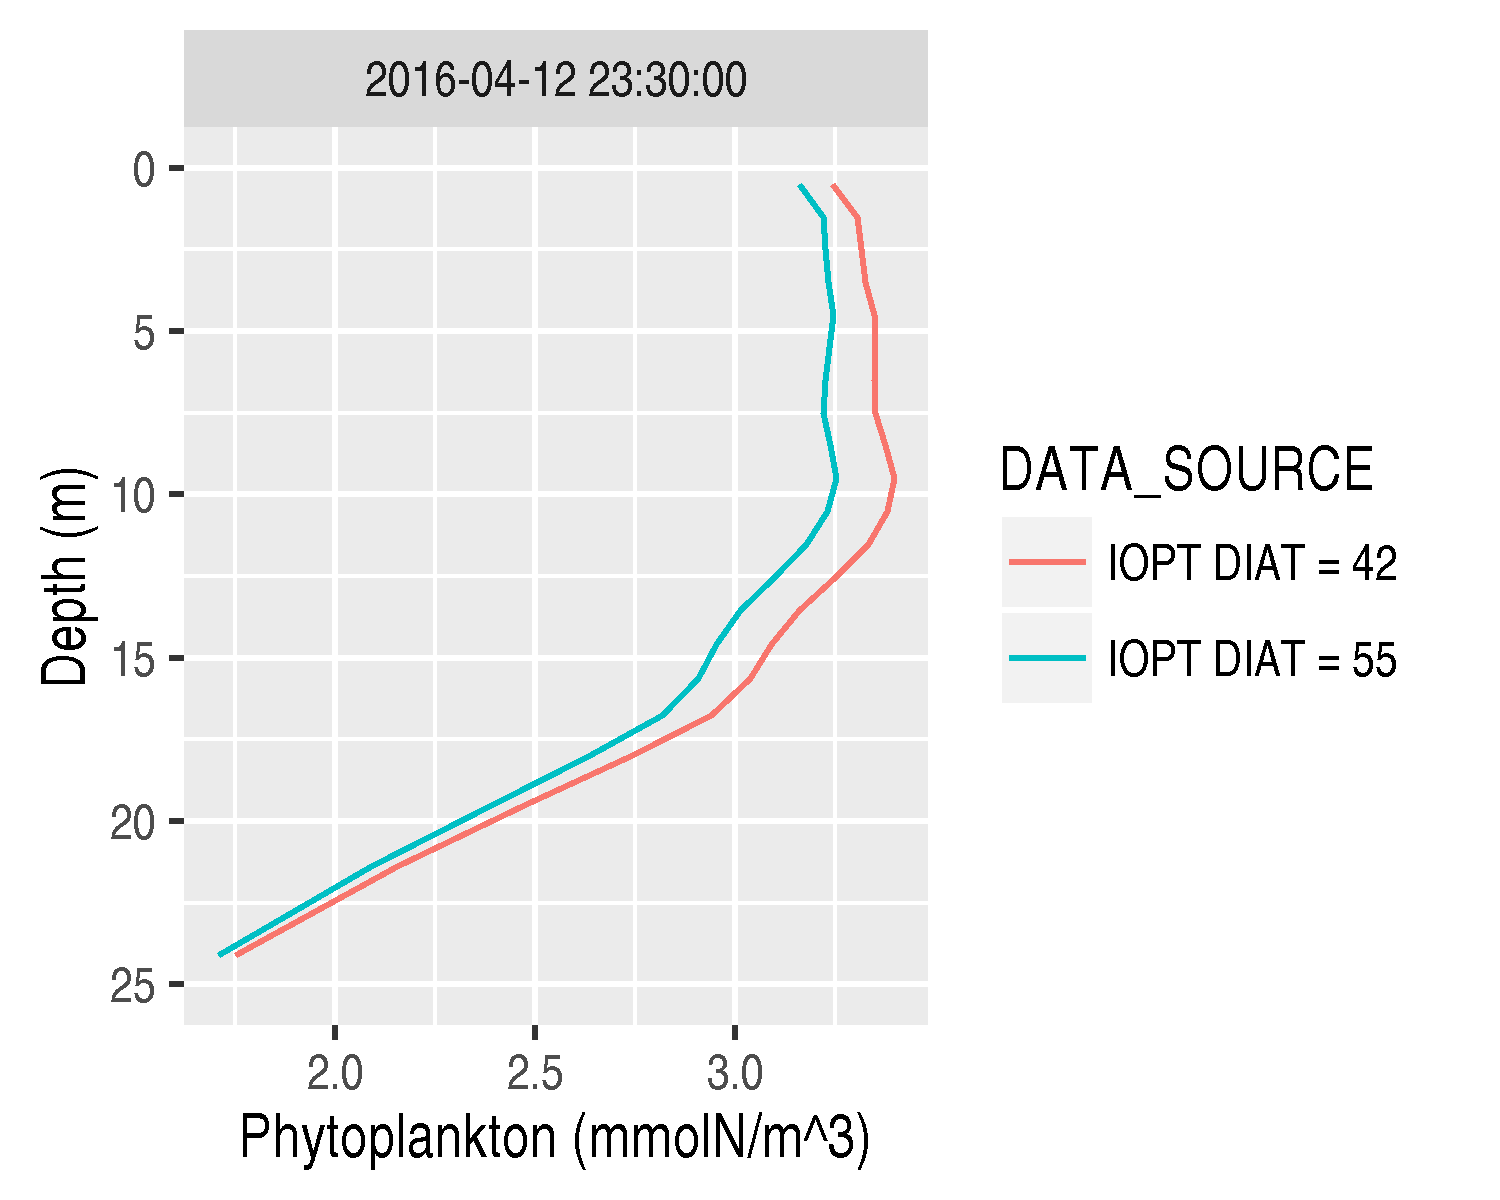

In [18]:
%%R -i combined,var_name -h 1200 -w 1500 -r 400
combined = data.table(combined)
ggplot(combined[deptht < 25 & time_counter == max(time_counter) ], aes_string(y = "deptht", x = var_name, colour = "DATA_SOURCE")) + 
    geom_path() + ylim(25,0) +
    facet_wrap(~time_counter) +
    ylab("Depth (m)") + 
    xlab("Phytoplankton (mmolN/m^3)")

In [3]:
# Have to keep this and the next cell apart or it fails with memory error. Something to do with 
# Jupyter notebook caching
tracer = "NO3"
mod_tracer_depth_time =  m_grid_t[tracer].where(m_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)

In [4]:
now_tracer_depth_time =  n_grid_t[tracer].where(m_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)
var_name = "MEAN_" + tracer

In [17]:
mod_tracer_depth_time["DATA_SOURCE"] = "IOPT_DIAT_55"
now_tracer_depth_time["DATA_SOURCE"] = "IOPT_DIAT_42"
combined = pd.concat([mod_tracer_depth_time, now_tracer_depth_time])
combined.reset_index(inplace=True)

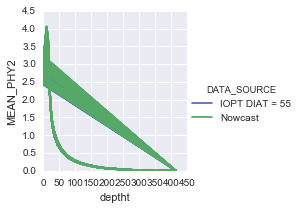

In [10]:
fg = sns.FacetGrid(data=combined, hue="DATA_SOURCE")
fg.map(plt.plot,"deptht", var_name).add_legend()


In [29]:
%%R
ggplot(combined, aes(x = ))

RRuntimeError: Error in SYS[[length(SYS) - 3L]][[1L]] == "knit_print.default" : 
  comparison (1) is possible only for atomic and list types


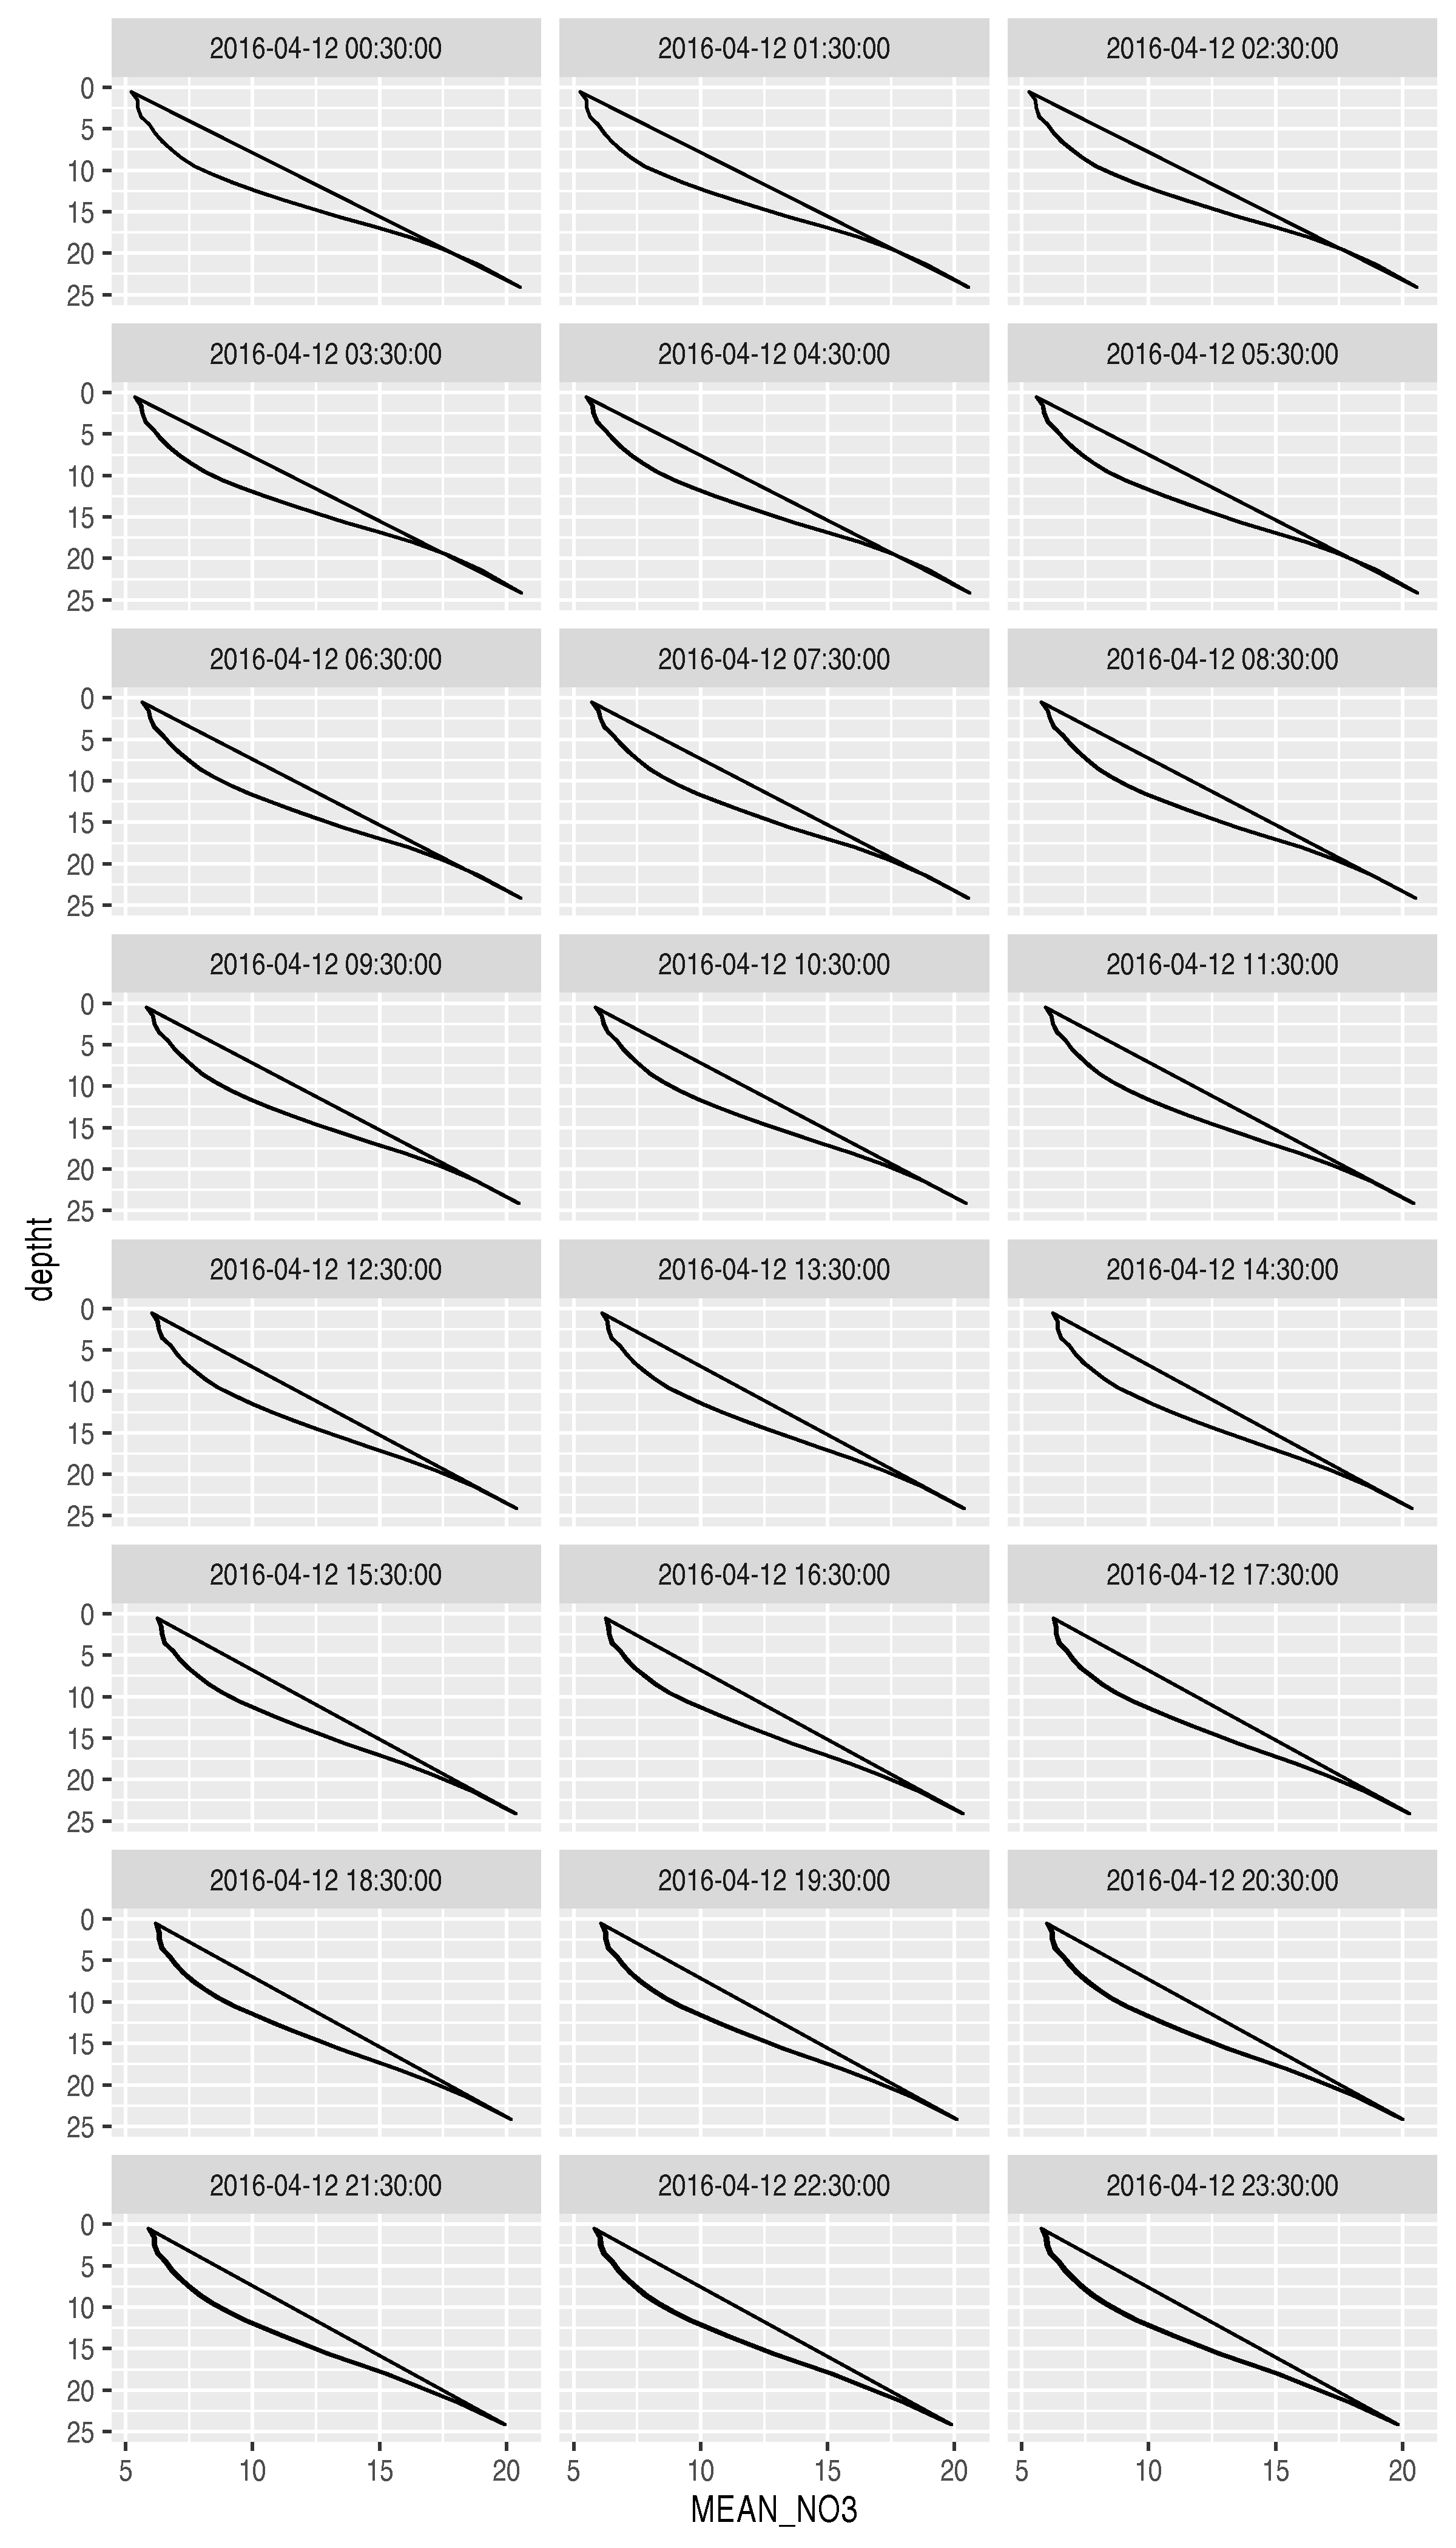

In [35]:
%%R -i combined,var_name -h 4200 -w 2400 -r 400
combined = data.table(combined)
ggplot(combined[deptht < 25,], aes_string(y = "deptht", x = var_name)) + 
    geom_path() + ylim(25,0) +
    facet_wrap(~time_counter, ncol = 3)

In [36]:
combined

,time_counter,deptht,time_centered,MEAN_NO3,DATA_SOURCE
0,2016-04-12 00:30:00,0.500000,2016-04-12 00:30:00,5.214778,IOPT_DIAT_55
1,2016-04-12 00:30:00,1.500003,2016-04-12 00:30:00,5.452885,IOPT_DIAT_55
2,2016-04-12 00:30:00,2.500011,2016-04-12 00:30:00,5.486822,IOPT_DIAT_55
3,2016-04-12 00:30:00,3.500031,2016-04-12 00:30:00,5.594474,IOPT_DIAT_55
4,2016-04-12 00:30:00,4.500071,2016-04-12 00:30:00,5.920553,IOPT_DIAT_55
5,2016-04-12 00:30:00,5.500151,2016-04-12 00:30:00,6.151240,IOPT_DIAT_55
6,2016-04-12 00:30:00,6.500310,2016-04-12 00:30:00,6.447138,IOPT_DIAT_55
7,2016-04-12 00:30:00,7.500623,2016-04-12 00:30:00,6.792811,IOPT_DIAT_55
8,2016-04-12 00:30:00,8.501236,2016-04-12 00:30:00,7.200050,IOPT_DIAT_55
9,2016-04-12 00:30:00,9.502433,2016-04-12 00:30:00,7.727039,IOPT_DIAT_55
